In [1]:
import pandas as pd
from collections import Counter
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#filter out withdrawn entrys from hgnc_biomart.txt

hgnc_bio_table = pd.read_csv('hgnc_biomart.txt', sep='\t')

hgnc_bio_table_approuved=hgnc_bio_table[hgnc_bio_table['Status']=='Approved']
hgnc_bio_table_withdrawn=hgnc_bio_table[hgnc_bio_table['Status']=='Entry Withdrawn']






In [7]:
##maybe rewrite this as fonction to be more efficient

ens_gene_table = pd.read_csv('ens_gene_synonymes.txt', sep="\t").to_dict("records")
ncbi_genes_table = pd.read_csv('mart_export_ncbi_genes.txt', sep='\t').to_dict('records')
hgnc_genes_table = pd.read_csv('mart_export_hgnc_genes.txt', sep='\t').to_dict('records')
hgnc_biomart_table=hgnc_bio_table_approuved.to_dict('records')




ensg_ncbi = [(x['Gene stable ID'], x['NCBI gene (formerly Entrezgene) accession']) for x in ncbi_genes_table if x['NCBI gene (formerly Entrezgene) accession'] is not np.nan]

ens_gene=[(x['Gene stable ID'], x['Gene Synonym']) for x in ens_gene_table if x['Gene Synonym'] is not np.nan]
ens_gene1=[(x['Gene stable ID'], x['Gene name']) for x in ens_gene_table if x['Gene name'] is not np.nan]

ens_hgnc1=[(x['Gene stable ID'], x['HGNC ID']) for x in hgnc_genes_table if x['HGNC ID'] is not np.nan]
ens_hgnc2=[(x['Gene stable ID'], x['HGNC symbol']) for x in hgnc_genes_table if x['HGNC symbol'] is not np.nan]


hgnc_gene_id=[(x['Ensembl gene ID'], x['HGNC ID']) for x in hgnc_biomart_table if x['HGNC ID'] is not np.nan]
hgnc_gene_id1=[(x['Ensembl gene ID'], x['Approved symbol']) for x in hgnc_biomart_table if x['Approved symbol'] is not np.nan]
hgnc_gene_h=[(x['HGNC ID'], x['Ensembl gene ID']) for x in hgnc_biomart_table if x['Ensembl gene ID'] is not np.nan]
hgnc_gene_h1=[(x['HGNC ID'], x['Approved symbol']) for x in hgnc_biomart_table if x['Approved symbol'] is not np.nan]

gene_tuples=ens_gene+ens_gene1+ensg_ncbi+ens_hgnc1+ens_hgnc2+hgnc_gene_id+hgnc_gene_id1+hgnc_gene_h+hgnc_gene_h1


In [8]:
#memory clear

ensg_ncbi.clear()
ens_gene.clear()
ens_gene1.clear()
ens_hgnc1.clear()
ens_hgnc2.clear()
hgnc_gene_id.clear()
hgnc_gene_id1.clear()
hgnc_gene_h.clear()
hgnc_gene_h1.clear()
ens_gene_table.clear()
ncbi_genes_table.clear()
hgnc_genes_table.clear()
hgnc_biomart_table.clear()


In [9]:
#graph generation
G = nx.Graph(gene_tuples)


[5, 6, 5, 6, 5, 15, 5, 5, 5, 6, 5, 5, 5, 5, 5, 11, 6120, 5, 9, 6, 7, 8, 7, 5, 6, 5, 6, 7, 5, 10, 5, 6, 6, 5, 7, 6, 41, 7, 17, 50, 9, 48, 47, 22, 42, 6, 45, 42, 47, 40, 10, 5, 6, 20, 5, 13, 25, 39, 59, 5, 24, 6, 6, 8, 6, 7, 5, 11, 7, 6, 7, 5, 5, 36, 6, 7, 8, 7, 5, 6, 6, 8, 6, 6, 5, 6, 6, 10, 105, 5, 5, 12, 13, 6, 13, 5, 5, 13, 5, 6, 5, 6, 21, 6, 8, 9, 8, 8, 27, 14, 7, 7, 5, 5, 6, 5, 5, 13, 17, 24, 8, 11, 10, 5, 5, 7, 5, 7, 6, 5, 6, 65, 10, 5, 6, 7, 12, 5, 7, 12, 6, 6, 6, 7, 7, 7, 5, 15, 5, 22, 5, 6, 5, 5, 5, 5, 5, 11, 9, 6, 5, 9, 5, 8, 6, 5, 11, 9, 12, 6, 5, 6, 8, 8, 12, 7, 6, 5, 7, 8, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 16, 6, 6, 12, 7, 7, 11, 28, 12, 10, 16, 6, 26, 5, 7, 12, 6, 14, 8, 54, 22, 5, 10, 10, 12, 13, 12, 7, 7, 8, 6, 11, 6, 12, 11, 7, 6, 10, 10, 8, 11, 10, 10, 34, 13, 11, 11, 9, 10, 12, 12, 5, 11, 5, 11, 15, 9, 12, 13, 14, 5, 11, 21, 5, 13, 22, 13, 9, 11, 10, 12, 13, 12, 39, 10, 7, 9, 10, 13, 12, 8, 14, 13, 13, 12, 11, 19, 10, 7, 11, 13, 13, 10, 14, 13, 23, 9, 9, 10, 14, 

(array([0.0000e+00, 0.0000e+00, 1.2080e+03, 1.5501e+04, 9.1650e+03,
        5.8160e+03, 3.3160e+03, 1.7430e+03, 9.1300e+02, 4.9000e+02,
        3.7500e+02, 2.3800e+02, 2.1100e+02, 1.8400e+02, 1.0200e+02,
        7.4000e+01, 6.3000e+01, 6.2000e+01, 4.6000e+01, 3.9000e+01,
        1.9000e+01, 3.1000e+01, 1.9000e+01, 1.0000e+01, 1.3000e+01,
        6.0000e+00, 1.0000e+01, 1.7000e+01, 7.0000e+00, 8.0000e+00,
        9.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00, 9.0000e+00,
        3.0000e+00, 5.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 <BarContainer object of 39 artists>)

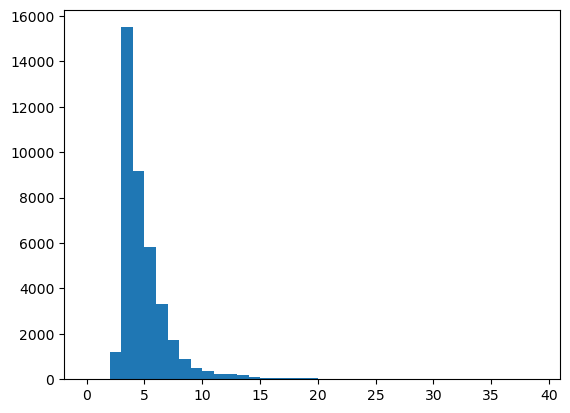

In [102]:
#geneeration of list of number or element in each cluster + visualisation
gene_tuples.clear()

len_list=[]
for i in list(nx.connected_components(G)):
    len_list.append(len(i))
bins=list(range(40))
plt.hist(len_list,bins=bins)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

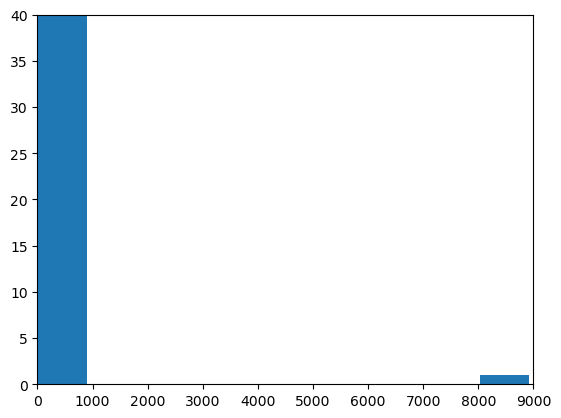

In [95]:
#visuel des tailles des clusters
plt.hist(len_list)
plt.axis([0,9000,0,40])
plt.show

In [ ]:
#visualitation
sorted(list(nx.connected_components(G)), key=lambda x: -len(x))[:15]




In [12]:

#generate dict from graph cluster data and assign a same unique id to each element of a cluster
gene_name_comp_dict={}
for n, comp in enumerate(nx.connected_components(G)):
    for gene_name in comp:
        gene_name_comp_dict.update({gene_name:n})


#extract the dict keys to a set
gene_name_comp_df=pd.DataFrame.from_dict(gene_name_comp_dict,orient='index')
gene_name_comp_set=set(gene_name_comp_df.index)

#extract the Open prot gene acc to a set
Openprot_gene_set = set(pd.read_csv('OpenProt_genes.txt', sep="\t").squeeze()) #df->series->set

#keep only the open prot gene acc not in cluster data to assign a unique id
set_diff=Openprot_gene_set-gene_name_comp_set



#create df with extra id from set diff
extra_id=range(len(list(nx.connected_components(G)))+1,len(list(nx.connected_components(G)))+len(set_diff)+1)
df_set_diff=pd.DataFrame(set_diff,columns=["gene"])
df_set_diff["id"]=extra_id



#format the diff to a dict
dict_set_diff=df_set_diff.set_index('gene')['id'].to_dict()






#take the original dict and drop all keys not in the intersection set then merge bth the intersect and the diff
set_intercept=Openprot_gene_set.intersection(gene_name_comp_set)

dict_set_intercept = {k: gene_name_comp_dict[k] for k in list(set_intercept)}

Uniprot_unique_gene_id_dict=dict_set_intercept | dict_set_diff



In [ ]:

dfresult=pd.DataFrame.from_dict(Uniprot_unique_gene_id_dict, orient='index')

dfresult.to_csv("result.tsv", sep='\t')

In [14]:
sorted(Counter(list(Uniprot_unique_gene_id_dict.values())).items(), key=lambda x: -x[1])[:10]

[(16, 2214),
 (22109, 756),
 (22110, 169),
 (10040, 93),
 (4129, 78),
 (3784, 52),
 (3371, 50),
 (12351, 42),
 (7711, 41),
 (2504, 36)]

73082